In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [2]:
df_all = pd.read_csv("./tables/compare_probs_all.csv")
df_avg = pd.read_csv("./tables/compare_probs_avg.csv")
df_ind = pd.read_csv("./tables/compare_probs_ind.csv")
df_ind_notwins = pd.read_csv("./tables/compare_probs_ind_notwins.csv")

In [3]:
def metric_name(x):
    if x['metric'] == 'mse':
        return "$\mu{-risk}$"
    elif x['metric'] == 'oracle':
        return "Oracle"
    else:
        ret = "$\\tau{-risk}"
        if x['metric'].startswith('rs'):
            ret += "_{R}$"
        elif x['metric'].startswith('match'):
            ret += "_{match}"
        else:
            ret += "_{plug}"
        
        if x['metric'].endswith('ate'):
            ret += "^{ATE}$"
        elif x['metric'].endswith('pehe'):
            ret += "^{PEHE}$"
        
        if x['metric'].startswith('rs'):
            bl = x['metric'].split('_')[-1].upper()
            ret += f" ({bl})"
        elif x['metric'].startswith('match'):
            k = x['metric'].split('_')[1][0]
            ret += f" (k={k})"
        else:
            spl = x['metric'].split('_')
            ret += f" ({spl[0].upper()}-{spl[1].upper()})"

        return ret

colors = mpl.color_sequences['Set2']

def metric_type(x):
    if x['metric'] == 'oracle':
        return colors[0]
    elif x['metric'] == 'mse':
        return colors[1]
    elif x['metric'].startswith(('sl', 'tl')):
        return colors[2]
    elif x['metric'].startswith('match'):
        return colors[3]
    elif x['metric'].startswith('rs'):
        return colors[4]

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_174770/1540834338.py:3: SyntaxWarning: invalid escape sequence '\m'
  return "$\mu{-risk}$"


In [4]:
df_all['metric_latex'] = df_all.apply(metric_name, axis=1)
df_all['metric_color'] = df_all.apply(metric_type, axis=1)

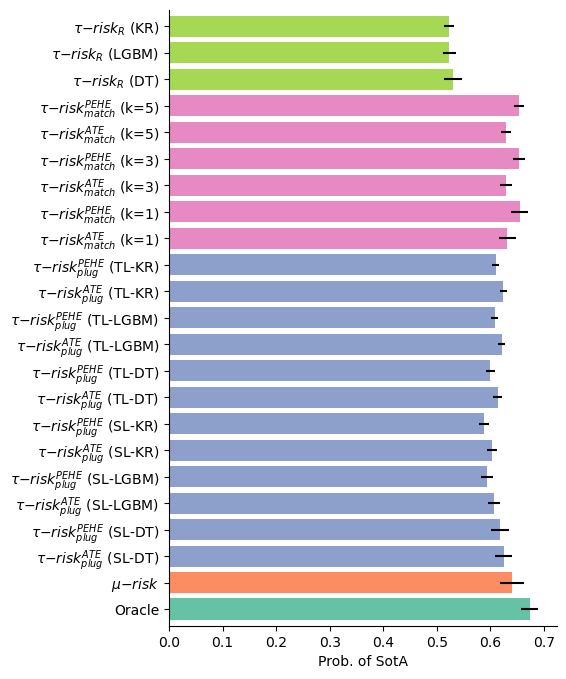

In [67]:
plt.figure(figsize=(5, 8))
plt.barh(df_all['metric_latex'], df_all['prob'], xerr=df_all['err'], color=df_all['metric_color'])
plt.margins(y=0.01)
plt.xlabel('Prob. of SotA')
plt.savefig('prob_metrics_all.pdf', dpi=1000, bbox_inches="tight")

Text(0.5, 0, 'Prob. of reaching SotA')

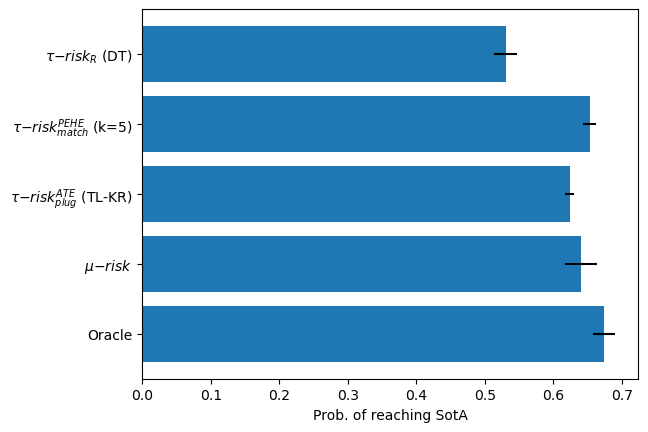

In [111]:
selected = ['oracle', 'mse', 'tl_kr_ate', 'match_5k_pehe', 'rs_dt']
df_all_case = df_all.loc[df_all['metric'].isin(selected)]

plt.barh(df_all_case['metric_latex'], df_all_case['prob'], xerr=df_all_case['err'])
plt.xlabel('Prob. of reaching SotA')

In [5]:
df_merge = df_avg.merge(df_ind, on='metric', suffixes=['_avg', '_ind'])
df_merge['metric_color'] = df_merge.apply(metric_type, axis=1)

<ErrorbarContainer object of 3 artists>

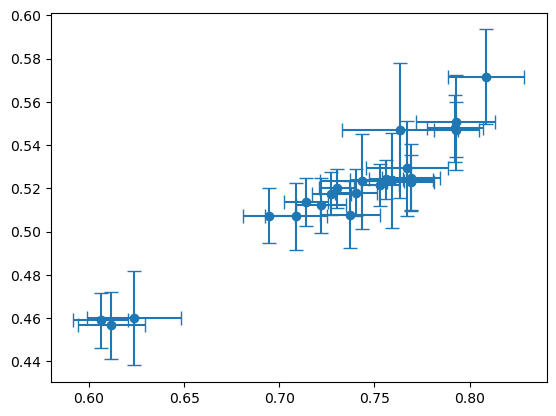

In [6]:
plt.errorbar(df_merge['prob_avg'], df_merge['prob_ind'], xerr=df_merge['err_avg'], yerr=df_merge['err_ind'], fmt='o', capsize=5)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_10307/947496855.py:5: SyntaxWarning: invalid escape sequence '\m'
  df_merge_case.loc[df_merge_case['metric'] == 'mse', 'metric'] = "$\mu{-risk}$"


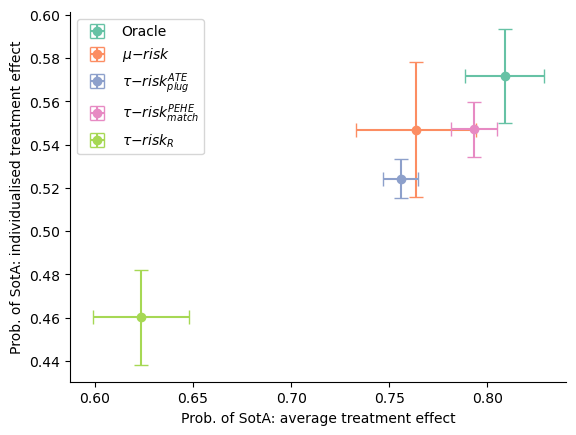

In [70]:
selected = ['oracle', 'mse', 'tl_kr_ate', 'match_5k_pehe', 'rs_dt']
df_merge_case = df_merge.loc[df_merge['metric'].isin(selected)]

df_merge_case.loc[df_merge_case['metric'] == 'oracle', 'metric'] = 'Oracle'
df_merge_case.loc[df_merge_case['metric'] == 'mse', 'metric'] = "$\mu{-risk}$"
df_merge_case.loc[df_merge_case['metric'] == 'tl_kr_ate', 'metric'] = "$\\tau{-risk}_{plug}^{ATE}$"
df_merge_case.loc[df_merge_case['metric'] == 'match_5k_pehe', 'metric'] = "$\\tau{-risk}_{match}^{PEHE}$"
df_merge_case.loc[df_merge_case['metric'] == 'rs_dt', 'metric'] = "$\\tau{-risk}_{R}$"

for row in df_merge_case.values:
    plt.errorbar(row[1], row[3], xerr=row[2], yerr=row[4], fmt='o', capsize=5, label=row[0], ecolor=row[5], mfc=row[5], mec=row[5])

plt.legend()
plt.xlabel('Prob. of SotA: average treatment effect')
plt.ylabel('Prob. of SotA: individualised treatment effect')

plt.savefig('prob_metrics_2d.pdf', dpi=1000, bbox_inches="tight")

In [6]:
df_merge

,metric,prob_avg,err_avg,prob_ind,err_ind,metric_color
0,oracle,0.808725,0.019971,0.571717,0.021796,"(0.4, 0.7607843137254902, 0.6470588235294118)"
1,mse,0.763514,0.030616,0.546939,0.031167,"(0.9882352941176471, 0.5529411764705883, 0.384..."
2,sl_dt_ate,0.759060,0.021715,0.523737,0.021999,"(0.5529411764705883, 0.6274509803921569, 0.796..."
3,sl_dt_pehe,0.743624,0.022171,0.523232,0.022000,"(0.5529411764705883, 0.6274509803921569, 0.796..."
4,sl_lgbm_ate,0.737248,0.015803,0.507828,0.015571,"(0.5529411764705883, 0.6274509803921569, 0.796..."
5,sl_lgbm_pehe,0.708725,0.016313,0.507071,0.015572,"(0.5529411764705883, 0.6274509803921569, 0.796..."
6,sl_kr_ate,0.722148,0.013132,0.512290,0.012712,"(0.5529411764705883, 0.6274509803921569, 0.796..."
7,sl_kr_pehe,0.694631,0.013502,0.507407,0.012714,"(0.5529411764705883, 0.6274509803921569, 0.796..."
8,tl_dt_ate,0.740436,0.011130,0.518056,0.011005,"(0.5529411764705883, 0.6274509803921569, 0.796..."
9,tl_dt_pehe,0.713926,0.011474,0.513636,0.011008,"(0.5529411764705883, 0.6274509803921569, 0.796..."


In [42]:
df_merge = df_avg.merge(df_ind_notwins, on='metric', suffixes=['_avg', '_ind'])

<ErrorbarContainer object of 3 artists>

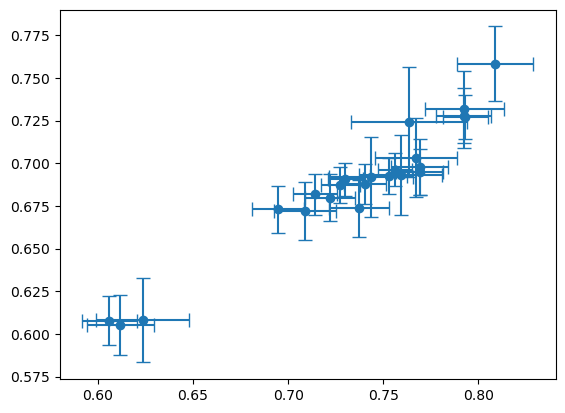

In [43]:
plt.errorbar(df_merge['prob_avg'], df_merge['prob_ind'], xerr=df_merge['err_avg'], yerr=df_merge['err_ind'], fmt='o', capsize=5)